# Лабораторная работа №3

# Метод прогонки для линейных дифференциальных уравнений второго порядка с периодическим решением

## Сидельников Станислав Игоревич

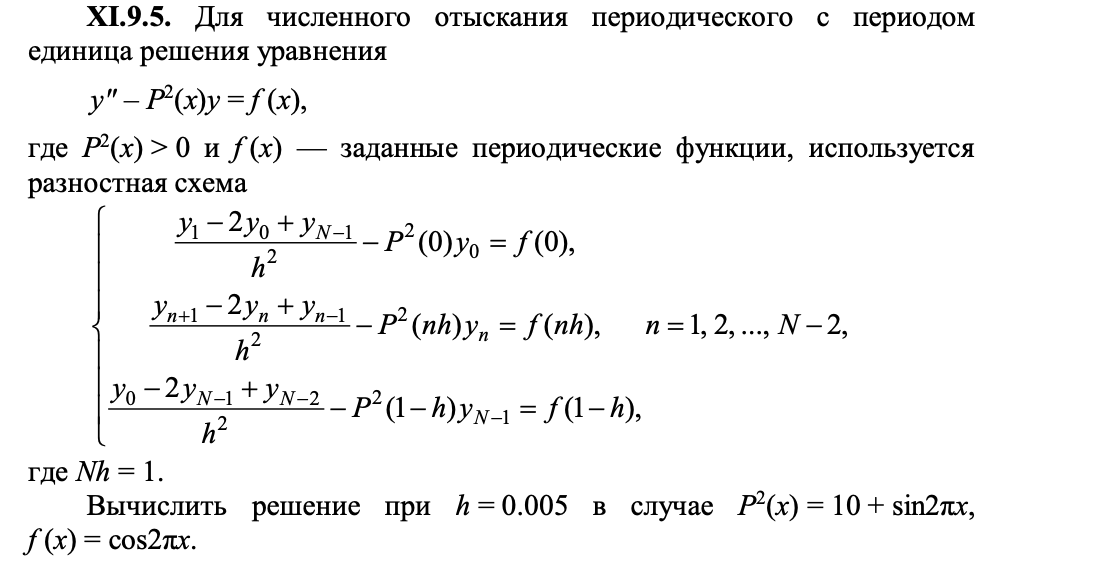

### Запишем систему сеточных соотношений

$ a_{0} y_{N} - b_{0}  y_{0} + c_{0} y_{1} = \varphi_{0} $

...

$ a_{n} y_{n - 1} - b_{n}  y_{n} + c_{n} y_{n + 1} = \varphi_{n} $

...

$ a_{N} y_{N - 1} - b_{N}  y_{N} + c_{N} y_{0} = \varphi_{N} $

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# шаг
h = 0.005

def q_n(n, h):
    return -10 - np.sin(2 * np.pi * n * h)

def f_n(n, h):
    return np.cos(2 * np.pi * n * h)

def fi_n(n, h):
    return f_n(n, h) * h ** 2

size = int(1 / h) + 1

a = [0] * size
b = [0] * size
c = [0] * size

In [13]:
# создание коэффициентов

for i in range(len(a)):
    a[i] = 1

for i in range(len(b)):
    b[i] = 2 - q_n(i, h) * (h ** 2)

for i in range(len(c)):
    c[i] = 1
    
alpha = [0] * size
beta = [0] * size
gamma = [0] * size

alpha[1] = c[0] / b[0]
for i in range(1, len(alpha) - 1):
    alpha[i + 1] = c[i] / (b[i] - alpha[i] * a[i])

beta[1] = -fi_n(0, h) / b[0]
for i in range(1, len(beta) - 1):
    beta[i + 1] = (a[i] * beta[i] - fi_n(i, h)) / (b[i] - alpha[i] * a[i])

gamma[1] = a[0] / b[0]
for i in range(1, len(gamma) - 1):
    gamma[i + 1] = (a[i] * gamma[i]) / (b[i] - alpha[i] * a[i])


In [14]:
mu = [0] * size
eta = [0] * size

mu[-1] = - c[-1] / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])
for i in range(len(mu) - 1, 0, -1):
    mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[-1]

eta[-1] = (fi_n(size - 1, h) - a[-1] * beta[-1]) / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])
for i in range(len(eta) - 1, 0, -1):
    eta[i - 1] = beta[i] + alpha[i] * eta[i] + gamma[i] * eta[-1]

In [15]:
# заполнение x и y

y = [0] * size
x = [0] * size

for i in range(len(x)):
    x[i] = i * h

y[0] = eta[0] / (1 - mu[0])
for i in range(1, len(y)):
    y[i] = mu[i] * y[0] + eta[i]

## Построение графика

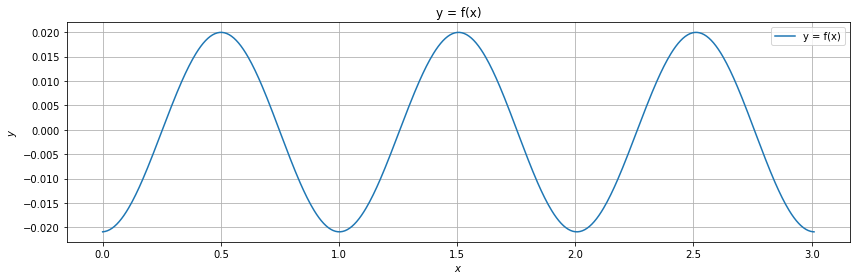

In [18]:

x_plot = [0] * size * 3
for i in range(len(x_plot)):
    x_plot[i] = i * h

y_plot = y + y + y

# y = f(x)
plt.figure(figsize=[12, 4])
plt.plot(x_plot, y_plot, label='y = f(x)')

plt.title("y = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

### Проверка условий периодичности

In [20]:
print("y[0] = ", y[0])
print("y[1] = ", y[-1])

y[0] =  -0.020891744564019567
y[1] =  -0.020895759459365816


### Аналитическое решение

In [21]:
A = np.array([np.zeros(size) for i in range(size)])
f = np.zeros(size)

A[0][0] = -b[0]
A[0][1] = c[0]
A[0][-1] = a[0]
f[0] = fi_n(0, h)

for i in range(1, size - 1):
    A[i][i - 1] = a[i]
    A[i][i] = -b[i]
    A[i][i + 1] = c[i]
    f[i] = fi_n(i, h)

A[-1][0] = c[-1]
A[-1][-2] = a[-1]
A[-1][-1] = -b[-1]
f[-1] = fi_n(size - 1, h)

y_theory = np.linalg.solve(A, f)

### График теоретического решения

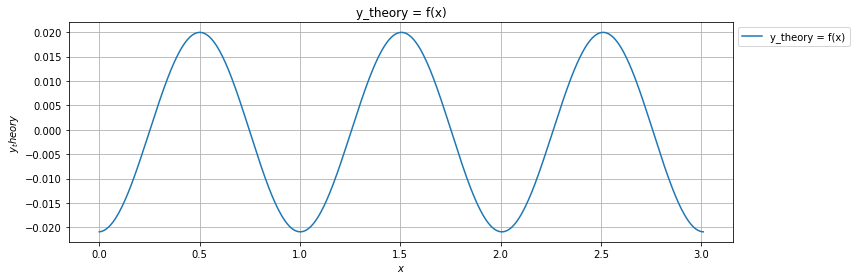

In [23]:
x_plot = [0] * size * 3
for i in range(len(x_plot)):
    x_plot[i] = i * h

y_plot = np.concatenate((y_theory, y_theory, y_theory))

# y = f(x)
plt.figure(figsize=[12, 4])
plt.plot(x_plot, y_plot, label='y_theory = f(x)')

plt.title("y_theory = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y_theory$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

## Итоги

# Всо очень хорошо совпало (теоретическое решение и численное)